<a href="https://colab.research.google.com/github/Armin-Abdollahi/Signal-Processing/blob/main/MNE_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNE Tutorial

In [37]:
from google.colab import drive
drive.mount('../content/drive')

Drive already mounted at ../content/drive; to attempt to forcibly remount, call drive.mount("../content/drive", force_remount=True).


In [3]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 18.9 MB/s eta 0:00:00


In [4]:
import mne
import matplotlib.pyplot as plt

In [5]:
image_dir="/content/drive/MyDrive/BCI_Database/hKFUPB20.cnt"

In [6]:
raw = mne.io.read_raw_cnt(image_dir, preload=True)

<ipython-input-6-aa947c0da253>:1: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(image_dir, preload=True)


Reading 0 ... 210790  =      0.000 ...  1053.950 secs...


In [7]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',

In [8]:
raw.crop?

In [9]:
raw.filter?

In [10]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<RawCNT | hKFUPB20.cnt, 24 x 210791 (1054.0 s), ~38.6 MB, data loaded>

Using matplotlib as 2D backend.


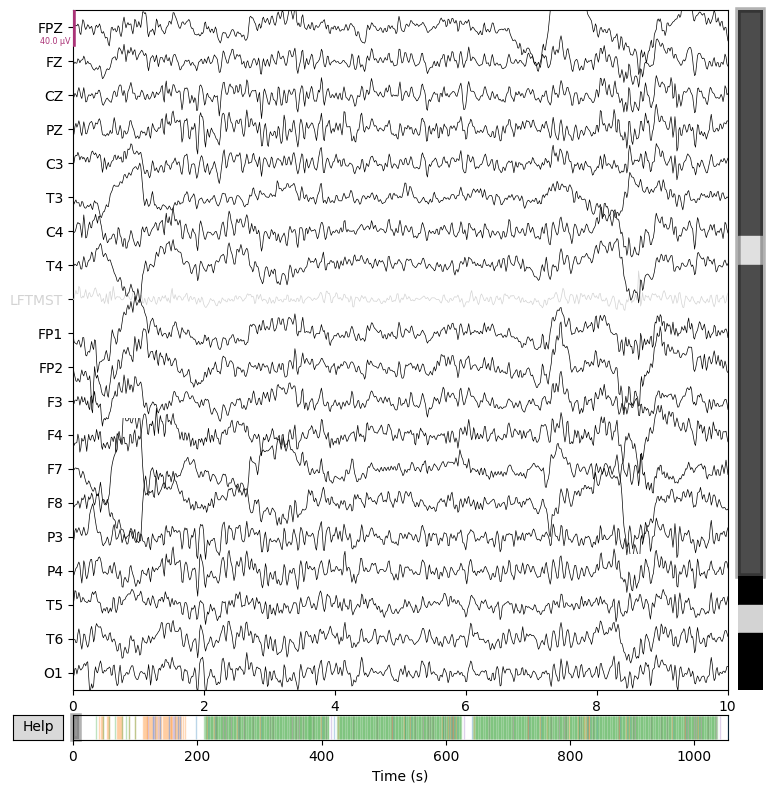

In [11]:
raw.plot();

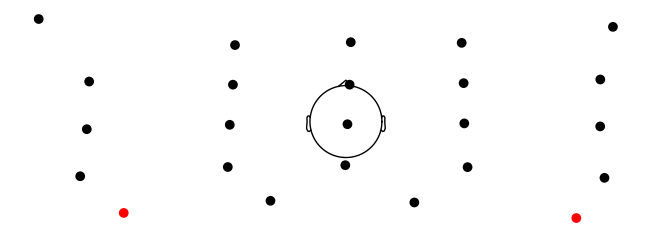

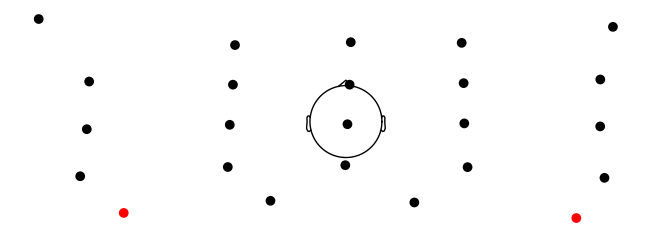

In [12]:
raw.plot_sensors(ch_type='eeg')

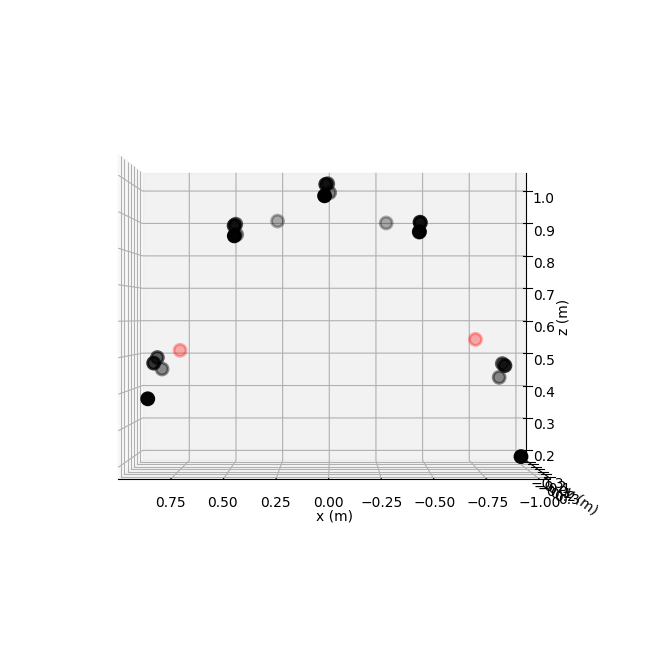

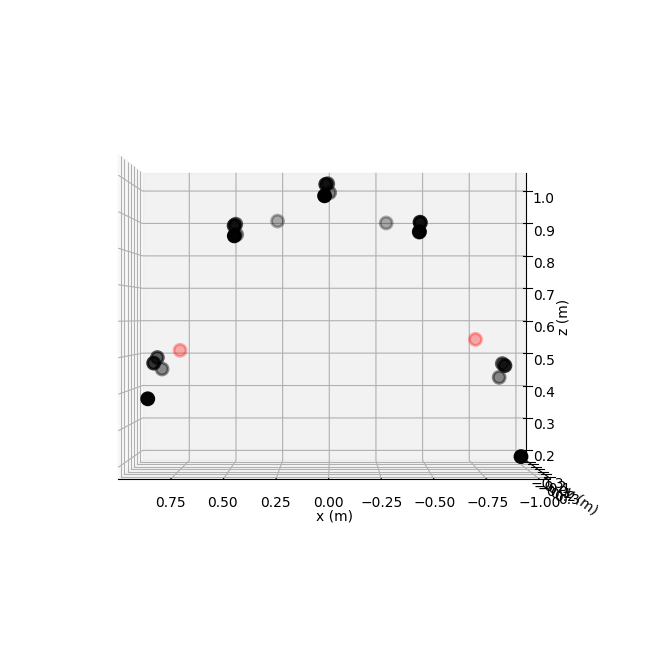

In [13]:
raw.plot_sensors(kind='3d', ch_type='eeg')

In [14]:
raw_eeg = raw.copy().pick_types(meg=False, eeg=True, eog=True, exclude=[])
len(raw_eeg.ch_names)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


24

In [15]:
raw_eeg.info

<Info | 10 non-empty values
 bads: 2 items (LFTMST, RHTMST)
 ch_names: FPZ, FZ, CZ, PZ, C3, T3, C4, T4, LFTMST, FP1, FP2, F3, F4, F7, ...
 chs: 24 EEG
 custom_ref_applied: False
 dig: 27 items (3 Cardinal, 24 EEG)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: unspecified
 nchan: 24
 projs: []
 sfreq: 200.0 Hz
 subject_info: 5 items (dict)
>

In [16]:
raw_eeg_cropped = raw_eeg.copy().crop(tmax=100)
raw_eeg_cropped.times[-1]

100.0

In [17]:
raw_eeg_cropped.load_data()

<RawCNT | hKFUPB20.cnt, 24 x 20001 (100.0 s), ~3.7 MB, data loaded>

In [18]:
raw_eeg_cropped_filtered = raw_eeg_cropped.filter(l_freq=0.1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (33.005 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [19]:
raw_eeg_cropped.load_data()
raw_eeg_cropped_filtered = raw_eeg_cropped.copy().filter(l_freq=0.1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (33.005 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


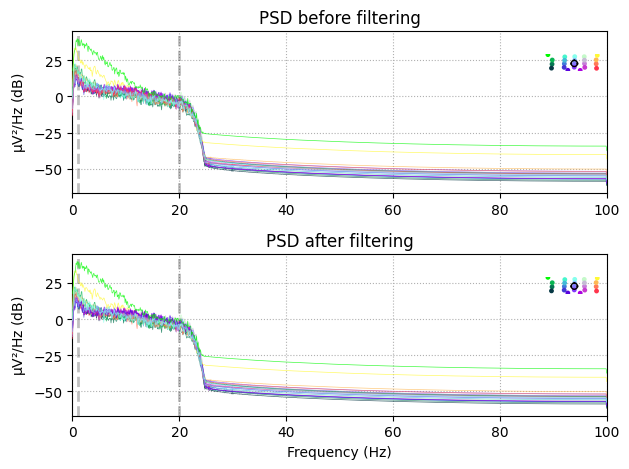

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

raw_eeg_cropped.plot_psd(ax=ax[0], show=False)
raw_eeg_cropped_filtered.plot_psd(ax=ax[1], show=False)

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
fig.set_tight_layout(True)
plt.show()

In [21]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [22]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 331 samples (1.655 s)

Fitting ICA to data using 22 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 20 components
Fitting ICA took 35.4s.


<ICA | raw data decomposition, method: fastica (fit in 72 iterations on 210791 samples), 20 ICA components (22 PCA components available), channel types: eeg, no sources marked for exclusion>

In [23]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

<RawCNT | hKFUPB20.cnt, 24 x 210791 (1054.0 s), ~38.6 MB, data loaded>

In [24]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [25]:
pca = PCA(n_components=15)

In [26]:
ica = FastICA(n_components=15, random_state=1)

In [27]:
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# فایل csv
# !wget https://example.com/data.csv
# X = pd.read_csv("data.csv")

In [28]:
std_scale = StandardScaler().fit_transform(X)

In [43]:
pca = PCA(n_components=2)

In [44]:
pca.fit(std_scale)

PCA(n_components=2)

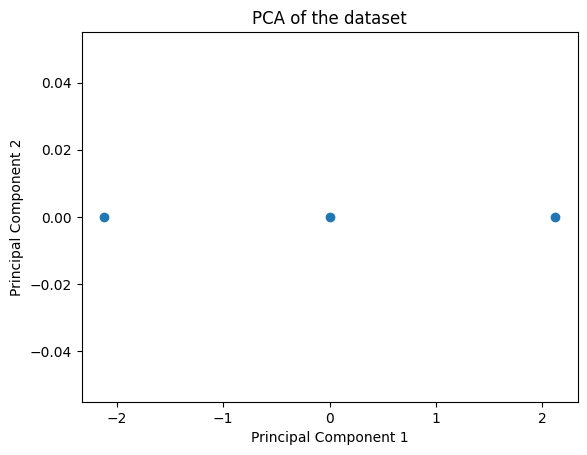

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'X' is your dataset containing the signal data
# Example: X = np.array([[1, 2], [3, 4], [5, 6]])

# Standardizing the features
X_std = StandardScaler().fit_transform(X)

# Performing PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
principalComponents = pca.fit_transform(X_std)

# Plotting the PCA
plt.figure()
plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.title('PCA of the dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [54]:
!pip install numpy

In [55]:
import numpy as np
from sklearn.decomposition import FastICA

In [56]:
print(std_scale)

[-1.22474487 -1.22474487 -1.22474487  0.          0.          0.
  1.22474487  1.22474487  1.22474487]


In [57]:
std_scale = std_scale.reshape(-1, 1)

In [58]:
print(std_scale)

[[-1.22474487]
 [-1.22474487]
 [-1.22474487]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.22474487]
 [ 1.22474487]
 [ 1.22474487]]


[]


In [59]:
ica.fit(std_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:589: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(


FastICA(n_components=15, random_state=1)

In [61]:
ica.components_

array([[0.33333333]])

In [71]:
from sklearn.decomposition import FastICA, PCA

In [73]:
# The plot_components() method is only available in the FastICA class from the scikit-learn module.
ica = FastICA(n_components=2, random_state=1)

# The sphere attribute is not available in the PCA class.
pca = PCA(n_components=2)

# Fix the code by replacing `ica.plot_components()` with `FastICA.plot_components()`.
ICA.plot_components(ica, outlines='skirt', sphere=pca.components_)
plt.show()

AttributeError: 'FastICA' object has no attribute 'plot_components'

In [74]:
ica.plot_components(outlines='skirt', sphere=pca.components_)
plt.show()

AttributeError: 'FastICA' object has no attribute 'plot_components'

In [75]:
ica.plot_components(outlines='skirt', sphere=sphere)

AttributeError: 'FastICA' object has no attribute 'plot_components'

In [76]:
ica.plot_topomap(ch_type='grad')

AttributeError: 'FastICA' object has no attribute 'plot_topomap'

In [77]:
ica.plot_properties(raw,picks=0)

AttributeError: 'FastICA' object has no attribute 'plot_properties'

In [78]:
ica.plot_properties(raw,picks=0,psd_args={'fmax':35})

AttributeError: 'FastICA' object has no attribute 'plot_properties'

In [79]:
ica.plot_properties(raw,picks=[1,2],psd_args={'fmax':35})

AttributeError: 'FastICA' object has no attribute 'plot_properties'

In [80]:
ica.plot_components(picks=range(10),inst=raw)

AttributeError: 'FastICA' object has no attribute 'plot_components'

In [81]:
import matplotlib.pyplot as plt

plt.close('all')

In [82]:
eog_epochs=create_eog_epochs(raw,reject=reject)

eog_inds,scores=ica.find_bads_eog(eog_epochs)

print(eog_inds)

NameError: name 'create_eog_epochs' is not defined

In [83]:
ica.plot_scores(scores)

AttributeError: 'FastICA' object has no attribute 'plot_scores'

In [84]:
ica.plot_scores(scores,exclude=eog_inds)

AttributeError: 'FastICA' object has no attribute 'plot_scores'

In [85]:
eog_average=create_eog_epochs(raw,reject=dict(mag=5e-12,grad=4000e-13),picks=picks_meg).average()

ica.plot_sources(eog_average,exclude=eog_inds)

NameError: name 'create_eog_epochs' is not defined

In [86]:
ica.plot_properties(eog_epochs,picks=eog_inds,psd_args={'fmax':35},image_args={'sigma':1})

AttributeError: 'FastICA' object has no attribute 'plot_properties'

In [64]:
print(ica.labels_)

AttributeError: 'FastICA' object has no attribute 'labels_'

In [87]:
ica.plot_overlay(eog_average,exclude=eog_inds,show=False)

AttributeError: 'FastICA' object has no attribute 'plot_overlay'

In [88]:
plt.close('all')

In [89]:
ecg_epochs=create_ecg_epochs(raw,tmin=-0.5,tmax=0.5)

ecg_inds,scores=ica.find_bads_ecg(ecg_epochs,method='ctps') # cross-trial phase statistics

print(ecg_inds)

ica.plot_scores(scores, exclude=ecg_inds)

NameError: name 'create_ecg_epochs' is not defined

In [90]:
ica.plot_properties(ecg_epochs,picks=ecg_inds,psd_args={'fmax':35.})

AttributeError: 'FastICA' object has no attribute 'plot_properties'

In [91]:
ecg_average=create_ecg_epochs(raw,reject=dict(mag=5e-12,grad=4000e-13),picks=picks_meg).average()

ica.plot_overlay(ecg_average,exclude=ecg_inds,show=False)

NameError: name 'create_ecg_epochs' is not defined

In [92]:
# ادامه فیلم آموزشی

In [93]:
ica.exclude = [1, 10, 14, 17, 18, 19]

In [94]:
bad_idx, scores = ica.find_bads_eog(raw, 'S02', threshold=2)
print(bad_idx)

AttributeError: 'FastICA' object has no attribute 'find_bads_eog'

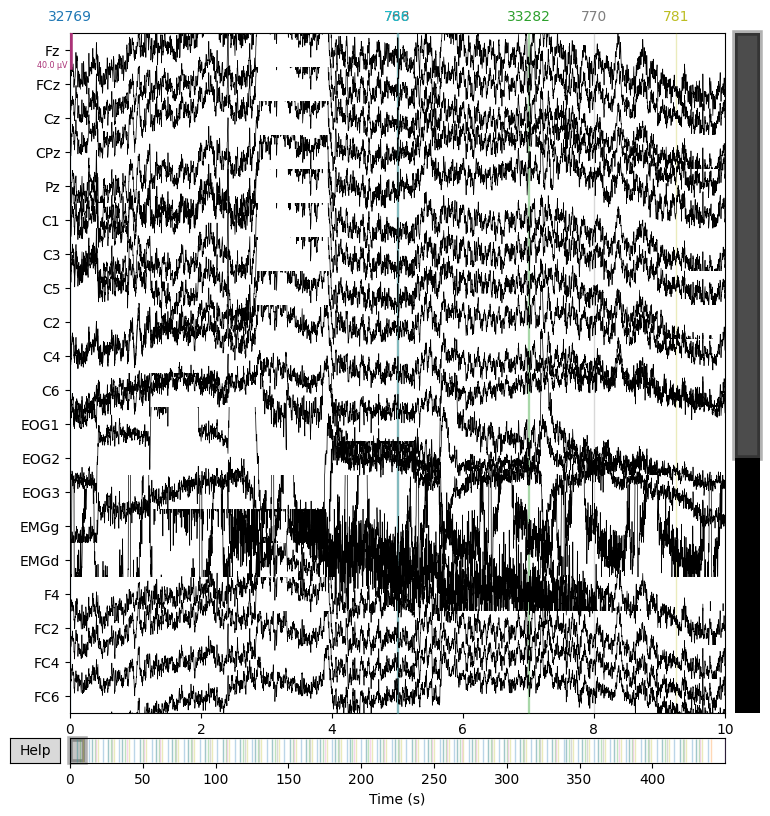

In [95]:
raw.plot();

In [96]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

AttributeError: 'FastICA' object has no attribute 'apply'

In [97]:
plt.rcParams["figure.figsize"]=20,10

In [98]:
mne.find_events?

In [99]:
events = mne.find_events(raw)

ValueError: No stim channels found, but the raw object has annotations. Consider using mne.events_from_annotations to convert these to events.

In [100]:
events

array([[     0,      0,      1],
       [  2560,      0,      5],
       [  2560,      0,      9],
       [  3584,      0,      3],
       [  4096,      0,      7],
       [  4736,      0,      8],
       [  6656,      0,     10],
       [  7680,      0,      5],
       [  7680,      0,      9],
       [  8704,      0,      3],
       [  9216,      0,      6],
       [  9856,      0,      8],
       [ 11776,      0,     10],
       [ 13312,      0,      5],
       [ 13312,      0,      9],
       [ 14336,      0,      3],
       [ 14848,      0,      7],
       [ 15488,      0,      8],
       [ 17408,      0,     10],
       [ 18432,      0,      5],
       [ 18432,      0,      9],
       [ 19456,      0,      3],
       [ 19968,      0,      6],
       [ 20608,      0,      8],
       [ 22528,      0,     10],
       [ 24576,      0,      5],
       [ 24576,      0,      9],
       [ 25600,      0,      3],
       [ 26112,      0,      6],
       [ 26752,      0,      8],
       [ 2

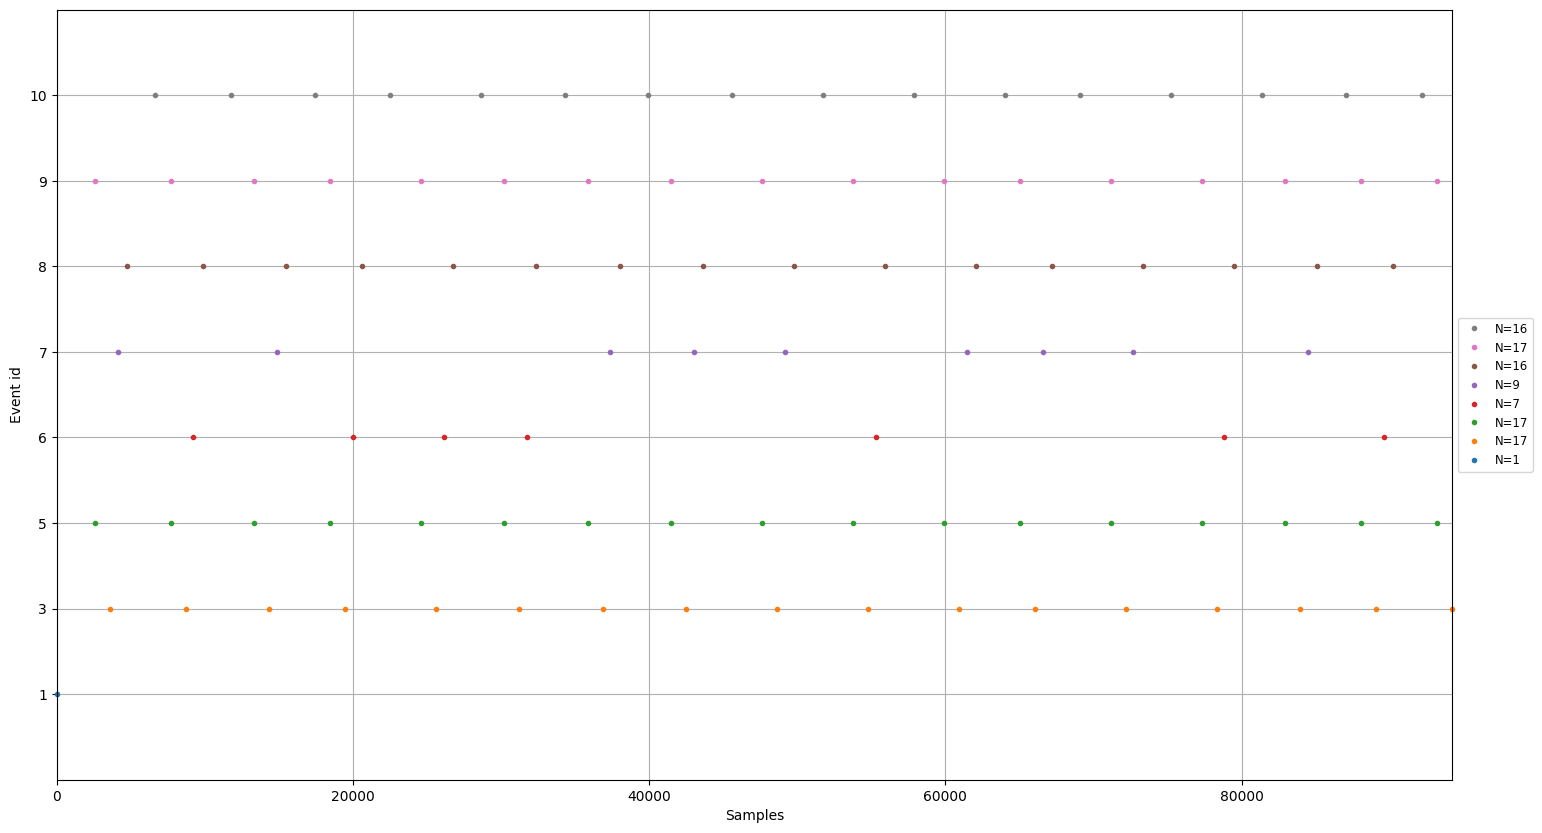

In [101]:
mne.viz.plot_events(events[:100]);

In [102]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

In [103]:
epochs = mne.Epochs(raw, events, events_id=event_ids)

TypeError: __init__() got an unexpected keyword argument 'events_id'

In [104]:
epochs.plot();

NameError: name 'epochs' is not defined

In [105]:
epochs = ica.apply(epochs, exclude=ica.exclude)

AttributeError: 'FastICA' object has no attribute 'apply'

In [106]:
epochs = mne.Epochs(raw, events, events_id=event_ids, preload=True)
epochs = ica.apply(epochs, exclude=ica.exclude)

TypeError: __init__() got an unexpected keyword argument 'events_id'

In [107]:
# تبدیل سیگنال به عکس اسپکتوگرام

In [108]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [109]:
# Replace 'your_file.cnt' with the path to your .cnt file
raw = mne.io.read_raw_gdf('/content/drive/MyDrive/BCI_Database/A1_R2_acquisition.gdf', preload=True)


Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/A1_R2_acquisition.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 230367  =      0.000 ...   449.936 secs...


<ipython-input-109-0458dd3edcc6>:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_gdf('/content/drive/MyDrive/BCI_Database/A1_R2_acquisition.gdf', preload=True)


In [110]:
raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawGDF | A1_R2_acquisition.gdf, 32 x 230368 (449.9 s), ~56.3 MB, data loaded>

In [111]:
data, times = raw[:]

# Select the data for a single channel, e.g., the first EEG channel
channel_data = data[0]


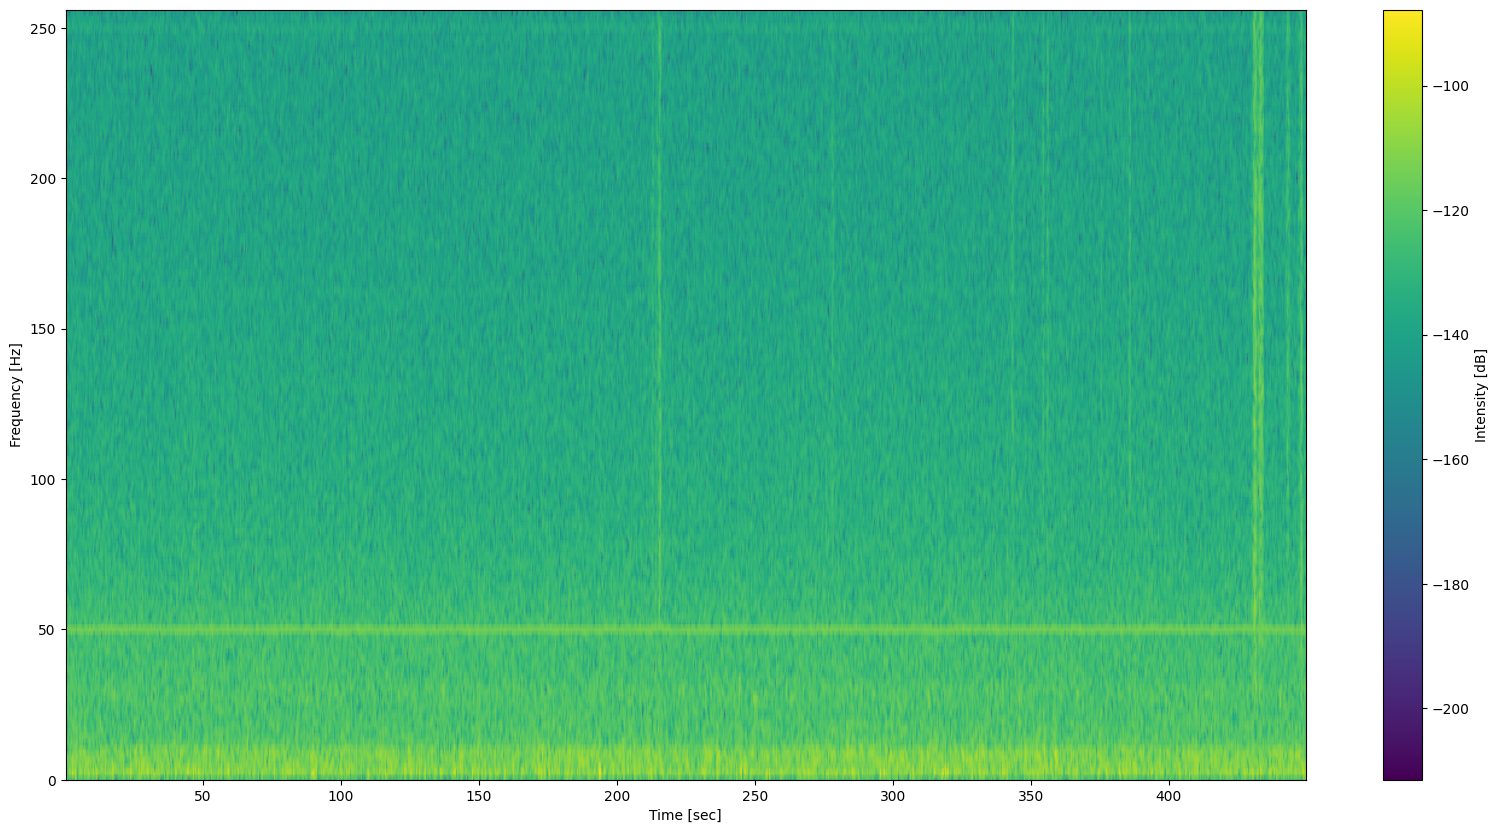

In [112]:
# Define the sampling frequency
fs = raw.info['sfreq']

# Generate the spectrogram
frequencies, times, Sxx = spectrogram(channel_data, fs)

# Plot the spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()


In [113]:
import numpy as np
import mne

In [114]:
filename = "/content/drive/MyDrive/BCI_Database/A1_R2_acquisition.gdf"
raw = mne.io.read_raw_gdf(filename)

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/A1_R2_acquisition.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...


<ipython-input-114-e50efbf5fc11>:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_gdf(filename)


In [115]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, ...
 chs: 32 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 512.0 Hz
 subject_info: 2 items (dict)
>


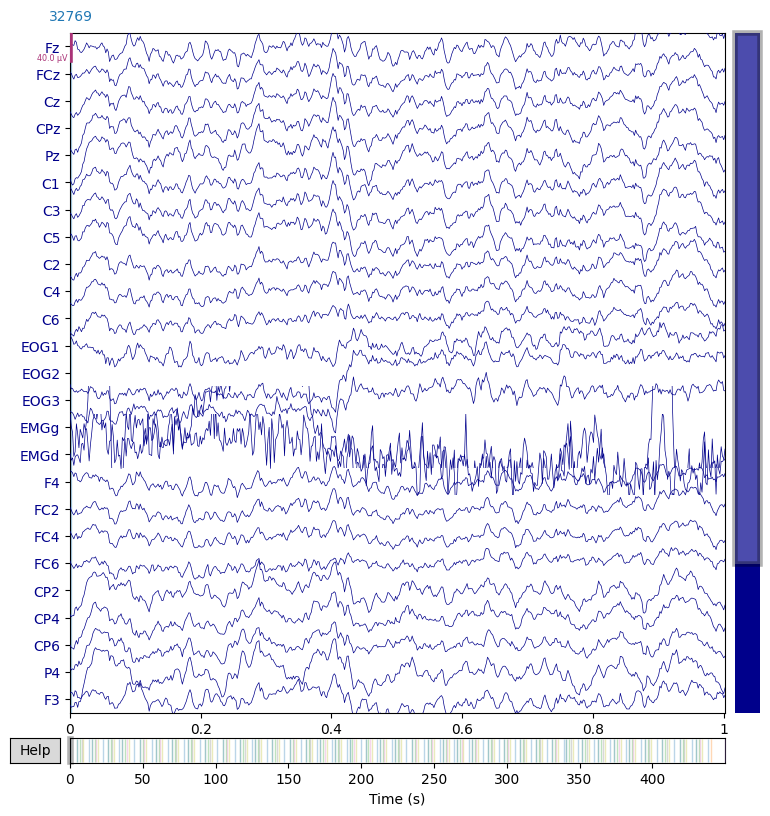

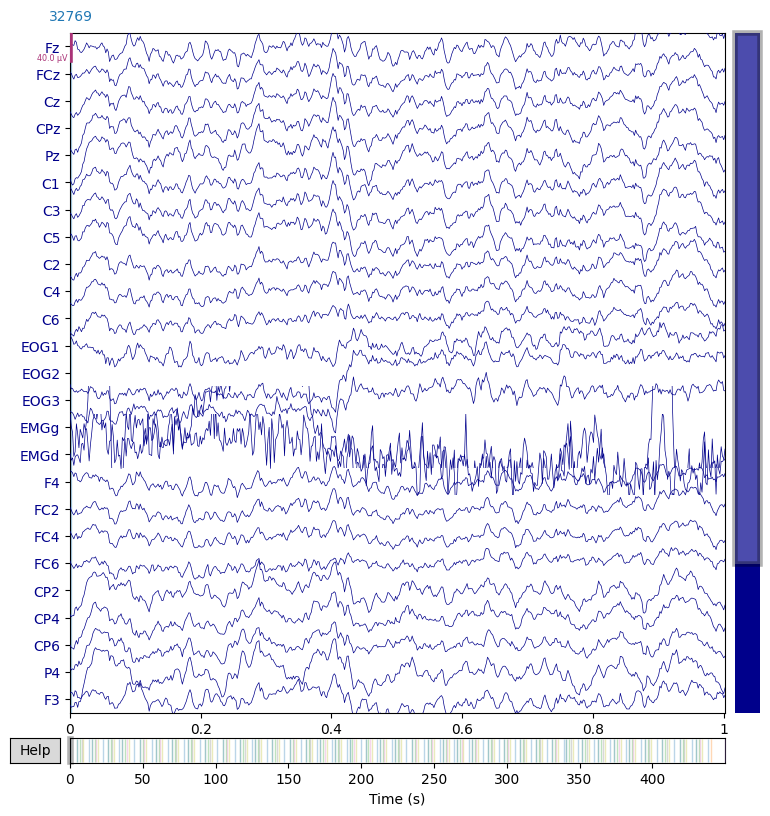

In [116]:
color1 = dict(eeg = 'darkblue', eog='k')
raw.plot(duration=1, n_channels=25, bgcolor='w', color=color1)

Effective window size : 4.000 (s)


<ipython-input-117-b22f77287575>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks='data', exclude="bads")


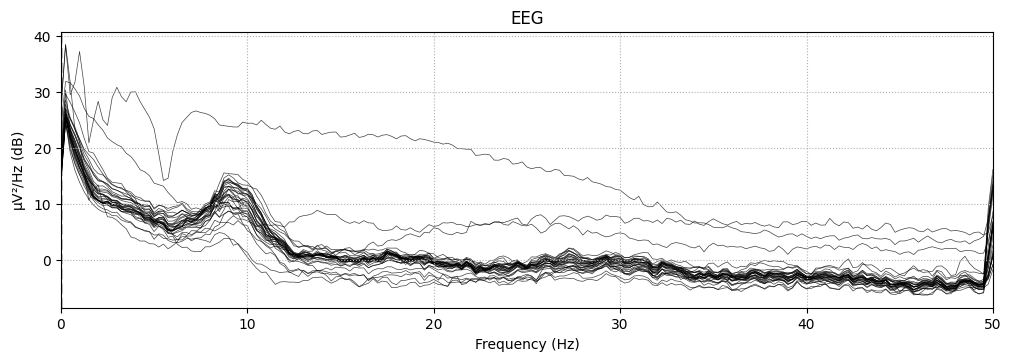

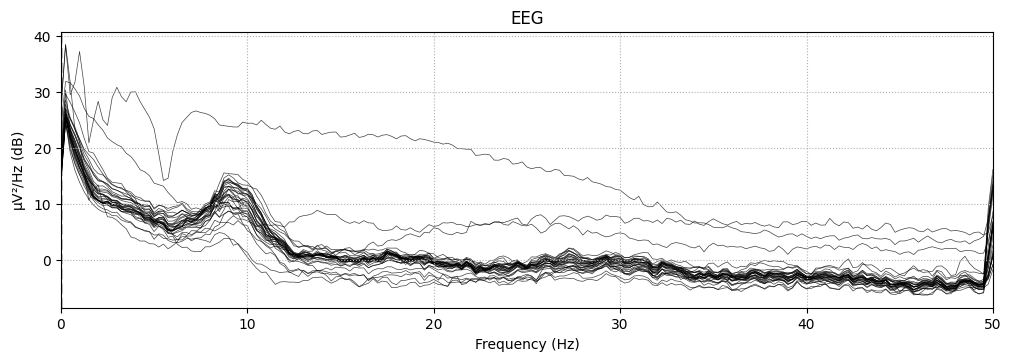

In [117]:
raw.compute_psd(fmax=50).plot(picks='data', exclude="bads")

In [118]:
events, _ = mne.events_from_annotations(raw)

Used Annotations descriptions: ['32769', '32770', '33282', '33284', '768', '769', '770', '781', '786', '800']
